In [24]:
import pandas as pd
import numpy as np

In [25]:
# https://data.ny.gov/Transportation/Turnstile-Usage-Data-2016/ekwu-khcy
# https://data.ny.gov/api/views/ekwu-khcy/rows.csv?accessType=DOWNLOAD
data = pd.read_csv('Turnstile_Usage_Data__2016.csv')
data.shape

/Users/brianmcmahon/anaconda3/envs/tensorflow1.4/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(9492670, 11)

In [26]:
df = pd.DataFrame(data)
df.shape

(9492670, 11)

In [27]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries',
       'Exits                                                     '],
      dtype='object')

In [28]:
df=df.rename(columns = {'Exits                                                     ':'Exits'})

In [29]:
df.columns

Index(['C/A', 'Unit', 'SCP', 'Station', 'Line Name', 'Division', 'Date',
       'Time', 'Description', 'Entries', 'Exits'],
      dtype='object')

In [30]:
df.describe()

,Entries,Exits
count,9.492670e+06,9.492670e+06
mean,3.542553e+07,2.850508e+07
std,1.953005e+08,1.754109e+08
min,0.000000e+00,0.000000e+00
25%,5.723050e+05,2.936032e+05
50%,2.595306e+06,1.507240e+06
75%,6.546587e+06,4.656424e+06
max,2.147480e+09,2.097170e+09


In [58]:
q4 = df.iloc[7000000:,3:]
print(q4.shape)
print(type(q4))

(2492670, 8)
<class 'pandas.core.frame.DataFrame'>


In [62]:
q4['Entry_Inc'] = abs(q4.Entries.diff())
q4['Exits_Inc'] = abs(q4.Exits.diff())
q4.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc
7000000,DELANCEY/ESSEX,FJMZ,BMT,10/06/2016,13:00:00,REGULAR,931275,3413870,NaN,NaN
7000001,DELANCEY/ESSEX,FJMZ,BMT,10/06/2016,17:00:00,REGULAR,931504,3414328,229.0,458.0
7000002,DELANCEY/ESSEX,FJMZ,BMT,10/06/2016,21:00:00,REGULAR,931634,3414871,130.0,543.0
7000003,DELANCEY/ESSEX,FJMZ,BMT,10/07/2016,01:00:00,REGULAR,931700,3415065,66.0,194.0
7000004,DELANCEY/ESSEX,FJMZ,BMT,10/07/2016,05:00:00,REGULAR,931720,3415099,20.0,34.0


In [63]:
# aggregate by station then by day
# add columns for incremental change by day
# remove outliers
# per station, two sep analyses: group by time, and group by date, weekday/weekend


q4.head()

,Station,Line Name,Division,Date,Time,Description,Entries,Exits,Entry_Inc,Exits_Inc
7000000,DELANCEY/ESSEX,FJMZ,BMT,10/06/2016,13:00:00,REGULAR,931275,3413870,NaN,NaN
7000001,DELANCEY/ESSEX,FJMZ,BMT,10/06/2016,17:00:00,REGULAR,931504,3414328,229.0,458.0
7000002,DELANCEY/ESSEX,FJMZ,BMT,10/06/2016,21:00:00,REGULAR,931634,3414871,130.0,543.0
7000003,DELANCEY/ESSEX,FJMZ,BMT,10/07/2016,01:00:00,REGULAR,931700,3415065,66.0,194.0
7000004,DELANCEY/ESSEX,FJMZ,BMT,10/07/2016,05:00:00,REGULAR,931720,3415099,20.0,34.0


In [64]:
q4_stndatetime = q4.groupby([ "Station", "Date",'Time']).sum()
q4_stndatetime.head()

Entries       Exits     Entry_Inc  \
Station Date       Time                                             
1 AV    02/27/2016 03:00:00  1559447715  3474879123  2.931167e+09   
                   07:00:00  1559448329  3474879572  6.140000e+02   
                   11:00:00  1559450338  3474881450  2.009000e+03   
                   15:00:00  1559454649  3474884217  4.311000e+03   
                   19:00:00  1559459665  3474887953  5.016000e+03   

                                Exits_Inc  
Station Date       Time                    
1 AV    02/27/2016 03:00:00  6.763618e+09  
                   07:00:00  5.710000e+02  
                   11:00:00  2.530000e+03  
                   15:00:00  4.227000e+03  
                   19:00:00  6.100000e+03

In [52]:
q4_stn = q4.groupby([ "Station"]).sum()
q4_stn.head()

,Entries,Exits
Station,,
1 AV,782286930031,889536556388
103 ST,87327489944,327444161793
103 ST-CORONA,36515551195,34485849080
104 ST,2671402272738,2690245046600
110 ST,15885661388,16084797176


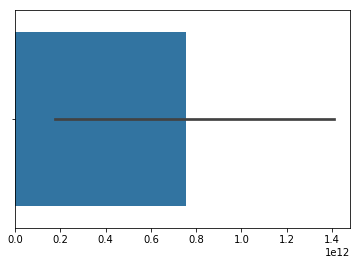

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

bystation = sns.barplot(x=['Entries','Exits'], y='Station', data=q4_stn)

In [43]:
q4_bydate = q4.groupby('Date').sum()
q4_bydate.head()

,Entries,Exits
Date,,
02/27/2016,934518238754,764011745137
02/28/2016,929064021681,759191005187
02/29/2016,972216227068,798941813078
03/01/2016,952537262094,780760865337
03/02/2016,936958917390,778064844993


In [10]:
q4_aggentry = q4.groupby('Station')['Entries'].sum()
q4_aggentry = pd.DataFrame(q4_aggentry)
q4_aggentry.head()

,Entries
Station,
1 AV,782286930031
103 ST,87327489944
103 ST-CORONA,36515551195
104 ST,2671402272738
110 ST,15885661388


In [11]:
q4_aggexit = q4.groupby('Station')['Exits'].sum()
q4_aggexit = pd.DataFrame(q4_aggexit)
q4_aggexit.head()

,Exits
Station,
1 AV,889536556388
103 ST,327444161793
103 ST-CORONA,34485849080
104 ST,2690245046600
110 ST,16084797176


In [19]:
# Entries / Exits by station
q4 = pd.concat((q4_aggentry, q4_aggexit))
q4 = q4.groupby('Station').sum()
q4 = pd.DataFrame(q4)
q4.head()

,Entries,Exits
Station,,
1 AV,7.822869e+11,8.895366e+11
103 ST,8.732749e+10,3.274442e+11
103 ST-CORONA,3.651555e+10,3.448585e+10
104 ST,2.671402e+12,2.690245e+12
110 ST,1.588566e+10,1.608480e+10


KeyError: 'Date'